In [56]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
import pandas as pd

# Model of known components/IGRB stuff

## Working out the model of known components

In [2]:
# Loading in everything

data_dir = "/Users/matias/Downloads/blazar_data/known_components/"

SFlowerArr    = np.loadtxt(data_dir + "SF_lower.csv", delimiter=',')
SFmidArr      = np.loadtxt(data_dir + "SF_mid.csv", delimiter=',')
SFupperArr    = np.loadtxt(data_dir + "SF_upper.csv", delimiter=',')

mAGNlowerArr  = np.loadtxt(data_dir + "mAGN_lower.csv", delimiter=',')
mAGNmidArr    = np.loadtxt(data_dir + "mAGN_mid.csv", delimiter=',')
mAGNupperArr  = np.loadtxt(data_dir + "mAGN_upper.csv", delimiter=',')

FSRQlowerArr  = np.loadtxt(data_dir + "fsrq_lower.csv", delimiter=',')
FSRQmidArr    = np.loadtxt(data_dir + "fsrq_mid.csv", delimiter=',')
FSRQupperArr  = np.loadtxt(data_dir + "fsrq_upper.csv", delimiter=',')

LAClowerArr   = np.loadtxt(data_dir + "bllac_lower.csv", delimiter=',')
LACmidArr     = np.loadtxt(data_dir + "bllac_mid.csv", delimiter=',')
LACupperArr   = np.loadtxt(data_dir + "bllac_upper.csv", delimiter=',')

knownLowerArr = np.loadtxt(data_dir + "all_lower.csv", delimiter=',')
knownMidArr   = np.loadtxt(data_dir + "all_mid.csv", delimiter=',')
knownUpperArr = np.loadtxt(data_dir + "all_upper.csv", delimiter=',')

In [12]:
# Interpolations of the above arrays
SFlower = interp1d(SFlowerArr[:,0], SFlowerArr[:,1], bounds_error=False, fill_value=0)
SFmid = interp1d(SFmidArr[:,0], SFmidArr[:,1], bounds_error=False, fill_value=0)
SFupper  = interp1d(SFupperArr[:,0], SFupperArr[:,1], bounds_error=False, fill_value=0)

mAGNlower = interp1d(mAGNlowerArr[:,0], mAGNlowerArr[:,1], bounds_error=False, fill_value=0)
mAGNmid = interp1d(mAGNmidArr[:,0], mAGNmidArr[:,1], bounds_error=False, fill_value=0)
mAGNupper = interp1d(mAGNupperArr[:,0], mAGNupperArr[:,1], bounds_error=False, fill_value=0)

FSRQlower = interp1d(FSRQlowerArr[:,0], FSRQlowerArr[:,1], bounds_error=False, fill_value=0)
FSRQmid = interp1d(FSRQmidArr[:,0], FSRQmidArr[:,1], bounds_error=False, fill_value=0)
FSRQupper = interp1d(FSRQupperArr[:,0], FSRQupperArr[:,1], bounds_error=False, fill_value=0)

LAClower  = interp1d(LAClowerArr[:,0], LAClowerArr[:,1], bounds_error=False, fill_value=0)
LACmid = interp1d(LACmidArr[:,0], LACmidArr[:,1], bounds_error=False, fill_value=0)
LACupper  = interp1d(LACupperArr[:,0], LACupperArr[:,1], bounds_error=False, fill_value=0)

knownLower = interp1d(knownLowerArr[:,0], knownLowerArr[:,1], bounds_error=False, fill_value=0)
knownMid = interp1d(knownMidArr[:,0], knownMidArr[:,1], bounds_error=False, fill_value=0)
knownUpper= interp1d(knownUpperArr[:,0], knownUpperArr[:,1], bounds_error=False, fill_value=0)

In [13]:
# Generates two column arrays [x,f(x)] where x is the energy in GeV, ranges from 0.2 to 700
arr = np.logspace(np.log10(0.2), np.log10(700), 1000)

SFlowerData = np.column_stack((arr, SFlower(arr)))
SFmidData = np.column_stack((arr, SFmid(arr)))
SFupperData    = np.column_stack((arr, SFupper(arr)))

mAGNlowerData  = np.column_stack((arr, mAGNlower(arr)))
mAGNmidData  = np.column_stack((arr, mAGNmid(arr)))
mAGNupperData  = np.column_stack((arr, mAGNupper(arr)))

FSRQlowerData  = np.column_stack((arr, FSRQlower(arr)))
FSRQmidData  = np.column_stack((arr, FSRQmid(arr)))
FSRQupperData  = np.column_stack((arr, FSRQupper(arr)))

LAClowerData   = np.column_stack((arr, LAClower(arr)))
LACmidData   = np.column_stack((arr, LACmid(arr)))
LACupperData   = np.column_stack((arr, LACupper(arr)))

knownLowerData = np.column_stack((arr, knownLower(arr)))
knownMidData   = np.column_stack((arr, knownMid(arr)))
knownUpperData = np.column_stack((arr, knownUpper(arr)))

In [5]:
# Transforming it into log space

SFupperLog   = np.column_stack((np.log10(SFupperData[:,0]), np.log10(SFupperData[:,1])))
SFlowerLog   = np.column_stack((np.log10(SFlowerData[:,0]), np.log10(SFlowerData[:,1])))
mAGNupperLog = np.column_stack((np.log10(mAGNupperData[:,0]), np.log10(mAGNupperData[:,1])))
mAGNlowerLog = np.column_stack((np.log10(mAGNlowerData[:,0]), np.log10(mAGNlowerData[:,1])))
FSRQupperLog = np.column_stack((np.log10(FSRQupperData[:,0]), np.log10(FSRQupperData[:,1])))
FSRQlowerLog = np.column_stack((np.log10(FSRQlowerData[:,0]), np.log10(FSRQlowerData[:,1])))
LACupperLog  = np.column_stack((np.log10(LACupperData[:,0]), np.log10(LACupperData[:,1])))
LAClowerLog  = np.column_stack((np.log10(LAClowerData[:,0]), np.log10(LAClowerData[:,1])))

/var/folders/dj/8r1_x74n4kl0y3xdypfr3zq40000gn/T/ipykernel_72424/1525203510.py:3: RuntimeWarning: divide by zero encountered in log10
  SFupperLog   = np.column_stack((np.log10(SFupperData[:,0]), np.log10(SFupperData[:,1])))
/var/folders/dj/8r1_x74n4kl0y3xdypfr3zq40000gn/T/ipykernel_72424/1525203510.py:7: RuntimeWarning: divide by zero encountered in log10
  FSRQupperLog = np.column_stack((np.log10(FSRQupperData[:,0]), np.log10(FSRQupperData[:,1])))
/var/folders/dj/8r1_x74n4kl0y3xdypfr3zq40000gn/T/ipykernel_72424/1525203510.py:8: RuntimeWarning: divide by zero encountered in log10
  FSRQlowerLog = np.column_stack((np.log10(FSRQlowerData[:,0]), np.log10(FSRQlowerData[:,1])))


In [6]:
# --- Compute Log-Differences ---
SFlogDiff   = np.column_stack((SFupperLog[:,0], (SFupperLog[:,1] - SFlowerLog[:,1]) / 2))
mAGNlogDiff = np.column_stack((SFupperLog[:,0], (mAGNupperLog[:,1] - mAGNlowerLog[:,1]) / 2))
LAClogDiff  = np.column_stack((SFupperLog[:,0], (LACupperLog[:,1] - LAClowerLog[:,1]) / 2))
FSRQlogDiff = np.column_stack((SFupperLog[:,0], (FSRQupperLog[:,1] - FSRQlowerLog[:,1]) / 2))

# Replace any infinities or NaN in FSRQlogDiff with 0.
FSRQlogDiff[:,1] = np.where((np.isinf(FSRQlogDiff[:,1]) | np.isnan(FSRQlogDiff[:,1])), 0, FSRQlogDiff[:,1])

/var/folders/dj/8r1_x74n4kl0y3xdypfr3zq40000gn/T/ipykernel_72424/1377821101.py:5: RuntimeWarning: invalid value encountered in subtract
  FSRQlogDiff = np.column_stack((SFupperLog[:,0], (FSRQupperLog[:,1] - FSRQlowerLog[:,1]) / 2))


In [7]:
# Combining the error

allError_x = SFlogDiff[:,0]
allError_y = 1 / (np.log(10) * 2 * np.sqrt(np.log(2))) * np.sqrt(
    SFlogDiff[:,1]**2 + mAGNlogDiff[:,1]**2 + LAClogDiff[:,1]**2 + FSRQlogDiff[:,1]**2)
allError = np.column_stack((allError_x, allError_y))

In [8]:
# Converting log-space back to linear scale.
error_x = 10**(allError[:,0])

error_y_upper = knownMidData[:,1] * 10**(allError[:,1])
error_y_lower = knownMidData[:,1] / 10**(allError[:,1])

In [21]:
diffuse_known

array([[4.00000000e-01, 3.38875072e-07],
       [4.03280857e-01, 3.38308911e-07],
       [4.06588623e-01, 3.37781797e-07],
       ...,
       [1.37731350e+03, 4.47992437e-09],
       [1.38861042e+03, 4.42925107e-09],
       [1.40000000e+03, 4.37816215e-09]])

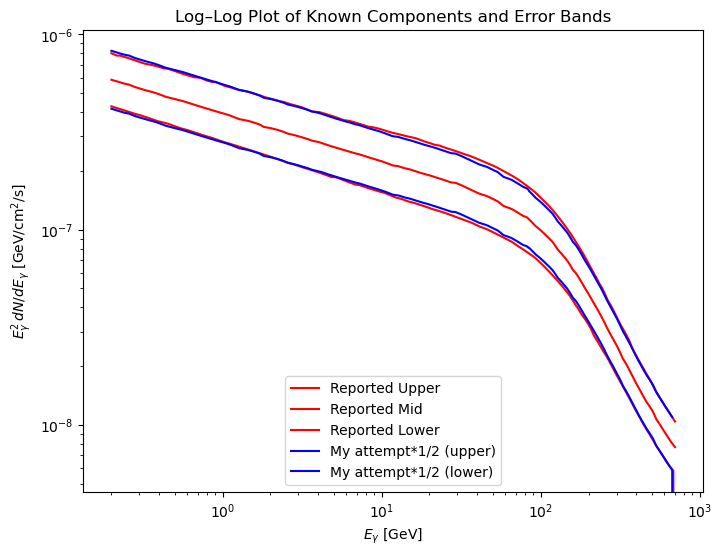

In [10]:
# Plotting everything
plt.figure(figsize=(8, 6))

# Plot reported data curves (in red)
plt.loglog(knownUpperData[:,0], knownUpperData[:,1], 'r-', label='Reported Upper')
plt.loglog(knownMidData[:,0],   knownMidData[:,1],   'r-', label='Reported Mid')
plt.loglog(knownLowerData[:,0], knownLowerData[:,1], 'r-', label='Reported Lower')

# Plot my attempted error bands (in blue)
plt.loglog(error_x, error_y_upper, 'b-', label='My attempt*1/2 (upper)')
plt.loglog(error_x, error_y_lower, 'b-', label='My attempt*1/2 (lower)')

plt.xlabel(r'$E_\gamma$ [GeV]')
plt.ylabel(r'$E_\gamma^2\, dN/dE_\gamma$ [GeV/cm$^2$/s]')
plt.title('Log–Log Plot of Known Components and Error Bands')
plt.legend(loc='lower center')
plt.show()


In [42]:
# In our case, gamma cascade already accounts for the BL Lacs and FSRQs so we must come up with a model of known components without them
diffuse_known_x = SFmidData[:,0]
diffuse_known_y = SFmidData[:,1] + mAGNmidData[:,1]
diffuse_known = np.column_stack((diffuse_known_x, diffuse_known_y))

diffuseError_x = SFlogDiff[:,0]
diffuseError_y = 1 / (np.log(10) * 2 * np.sqrt(np.log(2))) * np.sqrt(
    SFlogDiff[:,1]**2 + mAGNlogDiff[:,1]**2)
diffuseError = np.column_stack((diffuseError_x, diffuseError_y))

# Converting log-space back to linear scale.
diffuse_x_vals = 10**(diffuseError[:,0])

diffuse_y_upper = diffuse_known[:,1] * 10**(diffuseError[:,1])
diffuse_y_lower = diffuse_known[:,1] / 10**(diffuseError[:,1])

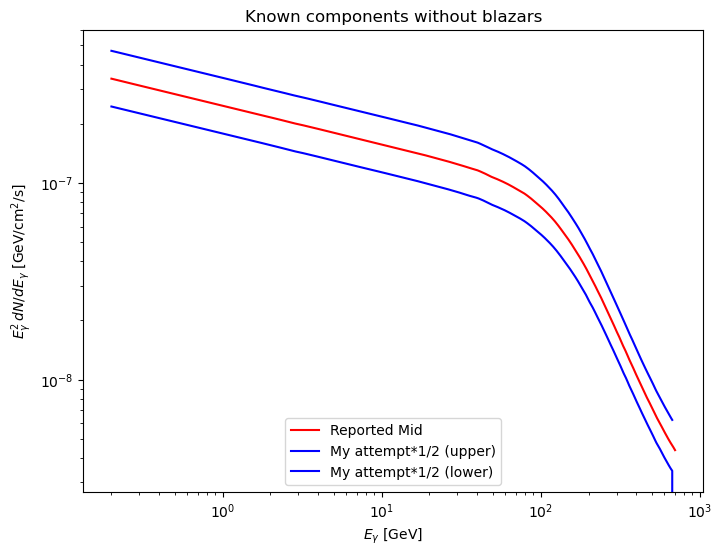

In [44]:
# Plotting everything
plt.figure(figsize=(8, 6))

# Plot reported data curves (in red)
plt.loglog(diffuse_known[:,0],   diffuse_known[:,1],   'r-', label='Reported Mid')

# Plot my attempted error bands (in blue)
plt.loglog(diffuse_x_vals, diffuse_y_upper, 'b-', label='My attempt*1/2 (upper)')
plt.loglog(diffuse_x_vals, diffuse_y_lower, 'b-', label='My attempt*1/2 (lower)')

plt.xlabel(r'$E_\gamma$ [GeV]')
plt.ylabel(r'$E_\gamma^2\, dN/dE_\gamma$ [GeV/cm$^2$/s]')
plt.title('Known components without blazars')
plt.legend(loc='lower center')
plt.show()


## Now working out the IGRB

In [126]:
data = pd.read_csv("/Users/matias/Downloads/blazar_data/apj504089t3_mrt.txt", delim_whitespace=True, header=None, skiprows=34).T

model_length = data.shape[1] // 3
modelAdata = data.iloc[:, :model_length]
modelBdata = data.iloc[:, model_length:2*model_length]
modelCdata = data.iloc[:, 2*model_length:]

# Select model A data
data = modelAdata

In [127]:
# Step 2: Extract relevant columns and compute IntToFlux
IntToFlux = np.trapz(x=np.linspace(100, 140, 1000), y=np.linspace(100, 140, 1000)**-2) * 10**3

energy_lower = np.array(data.iloc[1], dtype=float) * 10**-3
energy_upper = np.array(data.iloc[2], dtype=float) * 10**-3
energy_center = np.sqrt(energy_lower * energy_upper)

fIGRB = IntToFlux * np.array(data.iloc[3], dtype=float)
fIGRB_upp = IntToFlux * np.array(data.iloc[4], dtype=float)
fIGRB_low = IntToFlux * np.array(data.iloc[5], dtype=float)

fIGRB_fg_upp = IntToFlux * np.array(data.iloc[6], dtype=float)
fIGRB_fg_low = IntToFlux * np.array(data.iloc[7], dtype=float)

fEGB = IntToFlux * np.array(data.iloc[8], dtype=float)
fEGB_upp = IntToFlux * np.array(data.iloc[9], dtype=float)
fEGB_low = IntToFlux * np.array(data.iloc[10], dtype=float)

fEGB_fg_upp = IntToFlux * np.array(data.iloc[11], dtype=float)
fEGB_fg_low = IntToFlux * np.array(data.iloc[12], dtype=float)

In [128]:
# Step 3: Construct plottable tables
EGB_model = np.vstack((energy_center, energy_center * fEGB)).T
EGB_foreground_upper = np.vstack((energy_center, energy_center * (fEGB + fEGB_fg_upp))).T
EGB_foreground_lower = np.vstack((energy_center, energy_center * (fEGB - fEGB_fg_low))).T

IGRB_model = np.vstack((energy_center, energy_center * fIGRB)).T
IGRB_foreground_upper = np.vstack((energy_center, energy_center * (fIGRB + fIGRB_fg_upp))).T
IGRB_foreground_lower = np.vstack((energy_center, energy_center * (fIGRB - fIGRB_fg_low))).T

# Generate error bars
EGB_error = np.vstack((energy_center * fEGB_fg_low, energy_center * fEGB_fg_upp))
IGRB_error = np.vstack((energy_center * fIGRB_fg_low, energy_center * fIGRB_fg_upp))

(4e-09, 2e-06)

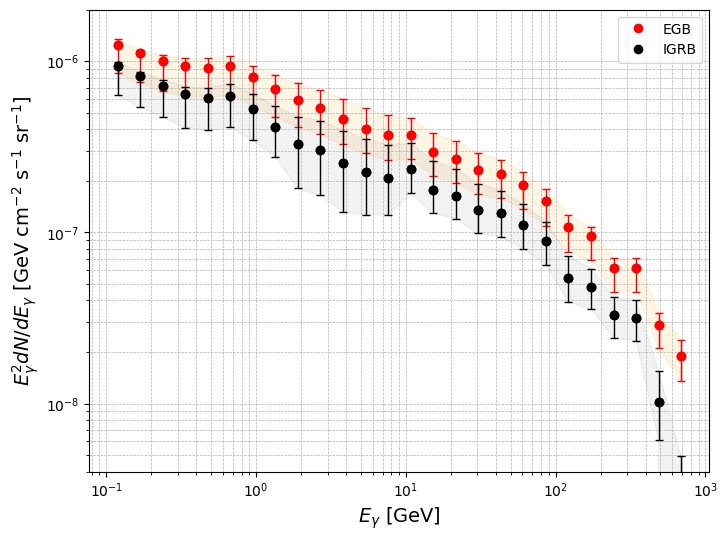

In [129]:
# Step 4: Generate plots
plt.figure(figsize=(8, 6))
plt.loglog(EGB_model[:, 0], EGB_model[:, 1], 'ro', label='EGB')
plt.fill_between(EGB_model[:, 0], EGB_foreground_lower[:, 1], EGB_foreground_upper[:, 1], color='orange', alpha=0.1)
plt.errorbar(EGB_model[:, 0], EGB_model[:, 1], yerr=EGB_error, fmt='ro', capsize=3, elinewidth=1)

plt.loglog(IGRB_model[:, 0], IGRB_model[:, 1], 'ko', label='IGRB')
plt.fill_between(IGRB_model[:, 0], IGRB_foreground_lower[:, 1], IGRB_foreground_upper[:, 1], color='gray', alpha=0.1)
plt.errorbar(IGRB_model[:, 0], IGRB_model[:, 1], yerr=IGRB_error, fmt='ko', capsize=3, elinewidth=1)

plt.xlabel('$E_\gamma$ [GeV]', fontsize=14)
plt.ylabel('$E_\gamma^2 dN/dE_\gamma$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim([4e-9, 2e-6])

# Onto the diffuse calculations

In [61]:
energies = np.loadtxt('/Users/matias/Downloads/flux_arrs/energies.csv', delimiter=',') # exported from gamma cascade
Gamma_arr = np.loadtxt('/Users/matias/Downloads/flux_arrs/GAMMA_arr.csv', delimiter=',')
Ecut_arr = np.loadtxt('/Users/matias/Downloads/flux_arrs/Ecut_arr.csv', delimiter=',')


flux_arr_ldde_dpl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/ldde_dpl.csv', delimiter=',')
flux_arr_ldde_pl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/ldde_pl.csv', delimiter=',')

flux_arr_ple_dpl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/ple_dpl.csv', delimiter=',')
flux_arr_ple_pl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/ple_pl.csv', delimiter=',')

flux_arr_pde_dpl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/pde_dpl.csv', delimiter=',')
flux_arr_pde_pl = np.loadtxt('/Users/matias/Downloads/flux_arrs/python/pde_pl.csv', delimiter=',')


flux_arr_ldde_dpl = flux_arr_ldde_dpl.reshape(3, 9, 300, 2)
flux_arr_ldde_pl = flux_arr_ldde_pl.reshape(3, 9, 300, 2)

flux_arr_ple_dpl = flux_arr_ple_dpl.reshape(3, 9, 300, 2)
flux_arr_ple_pl = flux_arr_ple_pl.reshape(3, 9, 300, 2)

flux_arr_pde_dpl = flux_arr_pde_dpl.reshape(3, 9, 300, 2)
flux_arr_pde_pl = flux_arr_pde_pl.reshape(3, 9, 300, 2)

## LDDE

### DPL

In [ ]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsLDDEdpl = [
    np.column_stack([
        energies,
        sum(
            (flux_arr_ldde_dpl[j][i][:, 1] + flux_arr_ldde_dpl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxLDDEdpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsLDDEdpl
]

(1e-07, 1e-05)

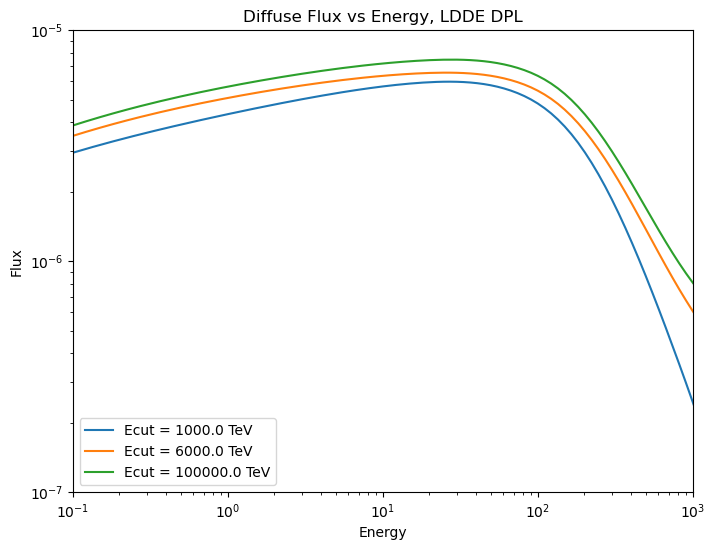

In [26]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsLDDEdpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, LDDE DPL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-7,1e-5])

In [48]:
# Compute the new diffuse flux values with the interpolated functions added
diffuseFluxLDDEdpl_vals = np.array([f(diffuse_known_x) for f in diffuseFluxLDDEdpl])

# Compute the updated diffuse flux including the interpolated values
diffuse_updated = [diffuse_known[:, 1] + diffuseFluxLDDEdpl_vals[i] for i in range(3)]

# Apply the same error calculation as done earlier in log-space
diffuse_y_upper = [diffuse_updated[i] * 10**(diffuseError[:, 1]) for i in range(3)]
diffuse_y_lower = [diffuse_updated[i] / 10**(diffuseError[:, 1]) for i in range(3)]

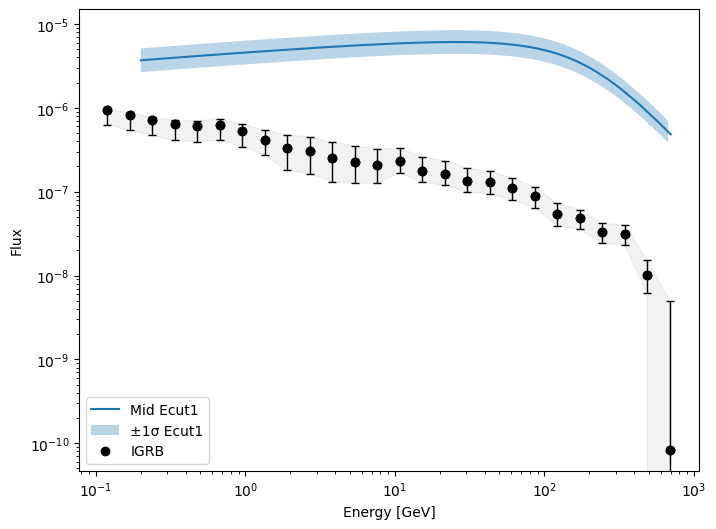

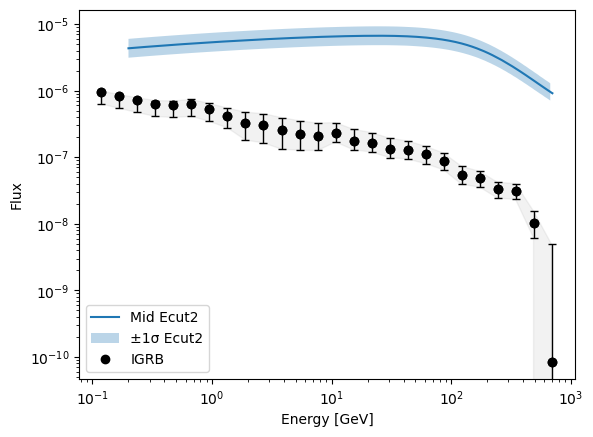

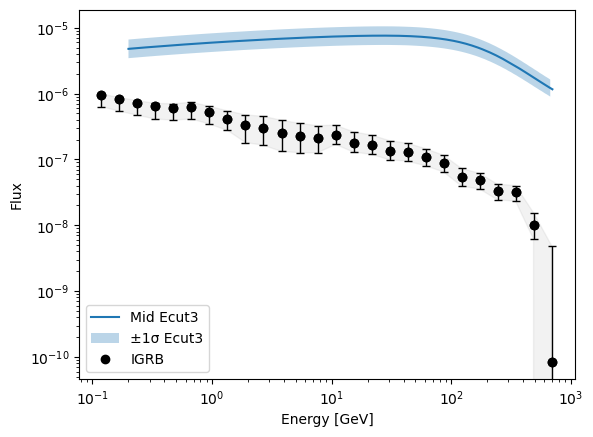

In [130]:
# Plot the results
plt.figure(figsize=(8, 6))
labels = ['Ecut1', 'Ecut2', 'Ecut3']

for i in range(3):
    plt.plot(diffuse_x_vals, diffuse_updated[i], label=f"Mid {labels[i]}")
    plt.fill_between(diffuse_x_vals, diffuse_y_lower[i], diffuse_y_upper[i], 
                     alpha=0.3, label=f"±1σ {labels[i]}")
    plt.loglog(IGRB_model[:, 0], IGRB_model[:, 1], 'ko', label='IGRB')
    plt.fill_between(IGRB_model[:, 0], IGRB_foreground_lower[:, 1], IGRB_foreground_upper[:, 1], color='gray', alpha=0.1)
    plt.errorbar(IGRB_model[:, 0], IGRB_model[:, 1], yerr=IGRB_error, fmt='ko', capsize=3, elinewidth=1)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Energy [GeV]")
    plt.ylabel("Flux")
    plt.legend()
    plt.show()
    

## PL

In [5]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsLDDEpl = [
    np.column_stack([
        energies,  # Assuming energies is a NumPy array
        sum(
            (flux_arr_ldde_pl[j][i][:, 1] + flux_arr_ldde_pl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxLDDEpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsLDDEpl
]

(1e-06, 0.0001)

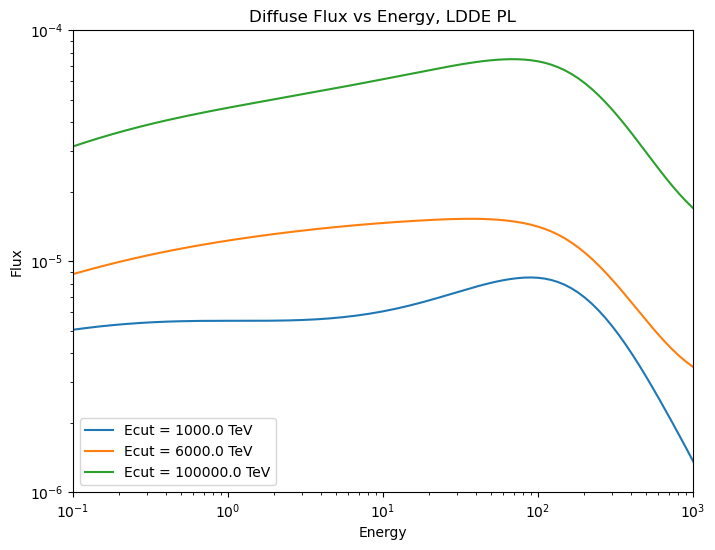

In [6]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsLDDEpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, LDDE PL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-6,1e-4])

## PLE

### DPL

In [7]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsPLEdpl = [
    np.column_stack([
        energies,  # Assuming energies is a NumPy array
        sum(
            (flux_arr_ple_dpl[j][i][:, 1] + flux_arr_ple_dpl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxPLEdpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsPLEdpl
]

(1e-06, 0.0001)

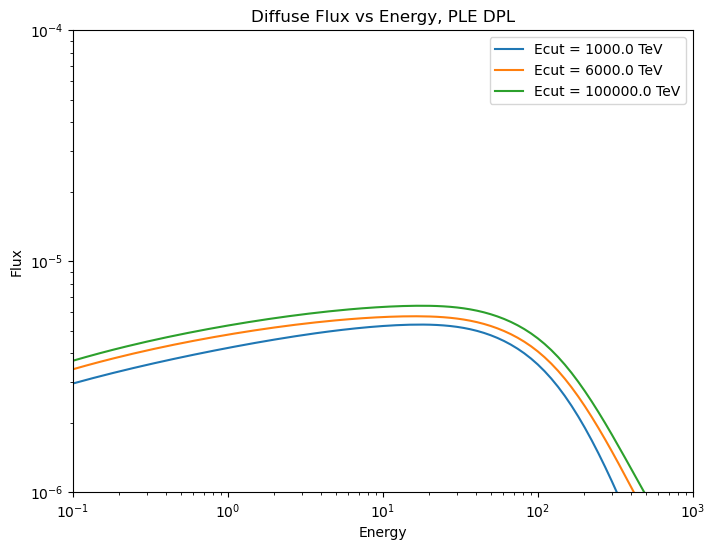

In [8]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsPLEdpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, PLE DPL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-6,1e-4])

### PL

In [9]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsPLEpl = [
    np.column_stack([
        energies,  # Assuming energies is a NumPy array
        sum(
            (flux_arr_ple_pl[j][i][:, 1] + flux_arr_ple_pl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxPLEpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsPLEpl
]

(1e-06, 0.0001)

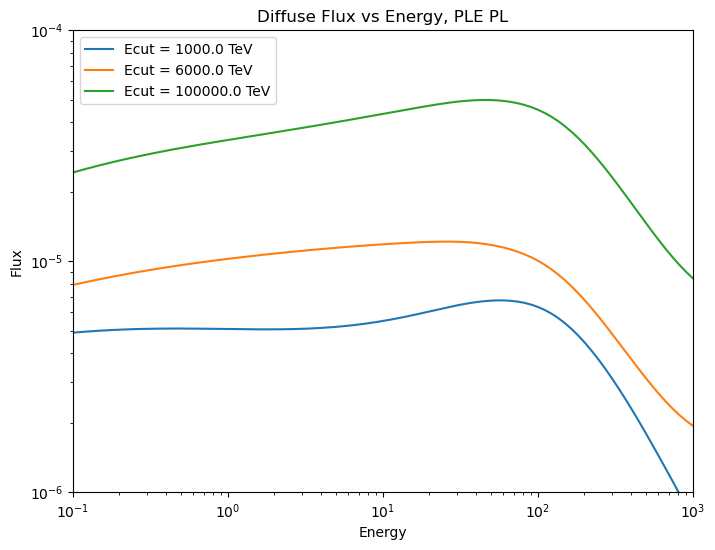

In [10]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsPLEpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, PLE PL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-6,1e-4])

## PDE

### DPL

In [62]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsPDEdpl = [
    np.column_stack([
        energies,  # Assuming energies is a NumPy array
        sum(
            (flux_arr_pde_dpl[j][i][:, 1] + flux_arr_pde_dpl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxPDEdpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsPDEdpl
]

(1e-06, 0.0001)

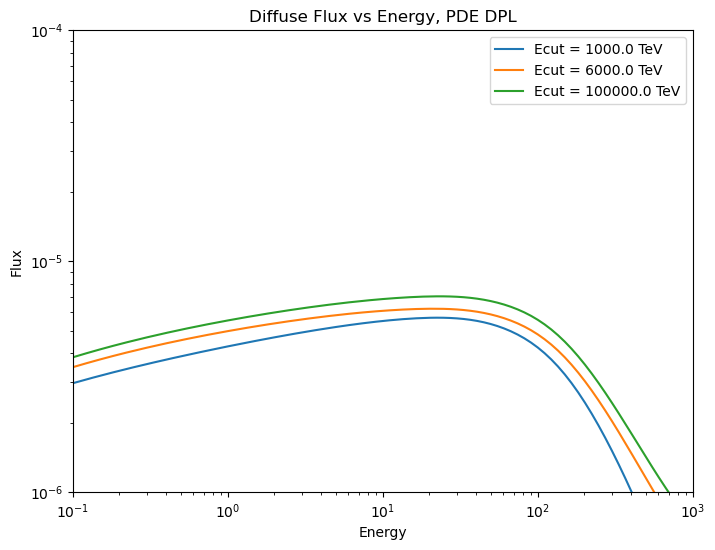

In [65]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsPDEdpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, PDE DPL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-6,1e-4])

### PL

In [63]:
Delta_Gamma = Gamma_arr[2] - Gamma_arr[1]

diffuseFluxArrsPDEpl = [
    np.column_stack([
        energies,  # Assuming energies is a NumPy array
        sum(
            (flux_arr_pde_pl[j][i][:, 1] + flux_arr_pde_pl[j][i + 1][:, 1]) / (2 * Delta_Gamma)
            for i in range(len(Gamma_arr) - 1)
        )
    ])
    for j in range(3)
]

diffuseFluxPDEpl = [
    interp1d(arr[:, 0], arr[:, 1], kind='linear', fill_value="extrapolate")
    for arr in diffuseFluxArrsPDEpl
]

(1e-06, 0.0001)

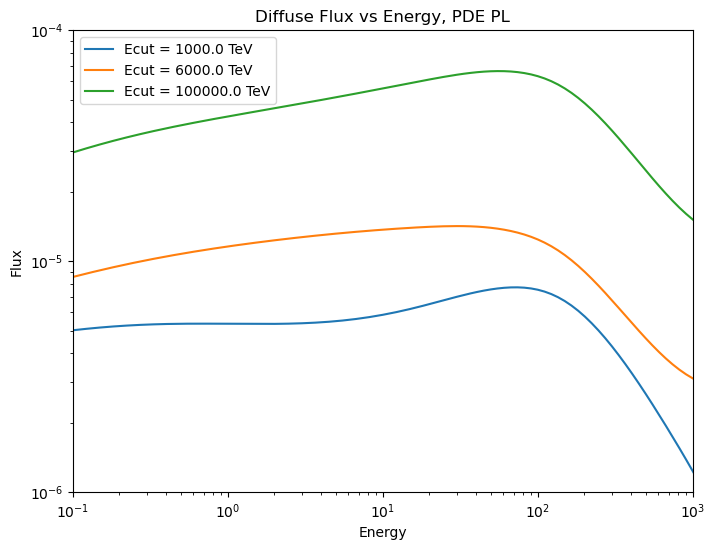

In [64]:
plt.figure(figsize=(8, 6))
for i, arr in enumerate(diffuseFluxArrsPDEpl):
    plt.plot(arr[:, 0], arr[:, 1], label=f"Ecut = "+str(Ecut_arr[i])+" TeV")

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()
plt.title("Diffuse Flux vs Energy, PDE PL")
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.1,1000])
plt.ylim([1e-6,1e-4])